#### Obtain vibrational energy levels and rotational temperatures for some small molecules from QM calculation (e.g. using Gaussian); calculate their Cv at various temperatures and compare with tabulated values

(Computational resources were provided by the e-INFRA CZ project (ID:90254), supported by the Ministry of Education, Youth and Sports of the Czech Republic. https://metavo.metacentrum.cz/)

***

Gaussian job setup for a frequency calculation using CCSD method and correlation-consistent polarized valence triple-zeta basis set:

```
%chk=l04_qmcalc.chk
#p opt freq ccsd/cc-pvtz

opt + freq on co2

0 1
C  0.0  0.0  0.0
O -1.0  0.0  0.0
O  1.0  0.0  0.0
```

Frequency information retrieved from the log file of the finished calculation:
```
 Harmonic frequencies (cm**-1), IR intensities (KM/Mole), Raman scattering
 activities (A**4/AMU), depolarization ratios for plane and unpolarized
 incident light, reduced masses (AMU), force constants (mDyne/A),
 and normal coordinates:
                      1                      2                      3
                     PIU                    PIU                    SGG
 Frequencies --    684.5137               684.5137              1389.7091
 Red. masses --     12.8774                12.8774                15.9949
 Frc consts  --      3.5550                 3.5550                18.2004
 IR Inten    --     34.3245                34.3245                 0.0000
  Atom  AN      X      Y      Z        X      Y      Z        X      Y      Z
     1   6     0.00   0.88   0.00     0.88  -0.00   0.00     0.00  -0.00  -0.00
     2   8    -0.00  -0.33   0.00    -0.33   0.00  -0.00    -0.00   0.00   0.71
     3   8    -0.00  -0.33  -0.00    -0.33   0.00  -0.00     0.00   0.00  -0.71
                      4
                     SGU
 Frequencies --   2434.6980
 Red. masses --     12.8774
 Frc consts  --     44.9746
 IR Inten    --    709.2532
  Atom  AN      X      Y      Z
     1   6    -0.00  -0.00   0.88
     2   8     0.00   0.00  -0.33
     3   8     0.00   0.00  -0.33
...
 -------------------
 - Thermochemistry -
 -------------------
 Temperature   298.150 Kelvin.  Pressure   1.00000 Atm.
 Atom     1 has atomic number  6 and mass  12.00000
 Atom     2 has atomic number  8 and mass  15.99491
 Atom     3 has atomic number  8 and mass  15.99491
 Molecular mass:    43.98983 amu.
 Principal axes and moments of inertia in atomic units:
                           1         2         3
     Eigenvalues --     0.00000 153.49903 153.49903
           X           -0.00000   1.00000   0.00000
           Y           -0.00000   0.00000   1.00000
           Z            1.00000   0.00000   0.00000
 This molecule is a prolate symmetric top.
 Rotational symmetry number  2.
 Rotational temperature (Kelvin)      0.56426
 Rotational constant (GHZ):          11.757346
 Zero-point vibrational energy      31063.6 (Joules/Mol)
                                    7.42439 (Kcal/Mol)
 Vibrational temperatures:    984.86   984.86  1999.48  3502.99
          (Kelvin)
 
 Zero-point correction=                           0.011832 (Hartree/Particle)
 Thermal correction to Energy=                    0.014438
 Thermal correction to Enthalpy=                  0.015382
 Thermal correction to Gibbs Free Energy=        -0.008854
 Sum of electronic and zero-point Energies=           -188.286840
 Sum of electronic and thermal Energies=              -188.284234
 Sum of electronic and thermal Enthalpies=            -188.283290
 Sum of electronic and thermal Free Energies=         -188.307525
 
                     E (Thermal)             CV                S
                      KCal/Mol        Cal/Mol-Kelvin    Cal/Mol-Kelvin
 Total                    9.060              6.798             51.008
 Electronic               0.000              0.000              0.000
 Translational            0.889              2.981             37.270
 Rotational               0.592              1.987             13.069
 Vibrational              7.579              1.830              0.669

```

#### Analysing calculation results

We can see from the log above that CO2 has 4 vibrational modes:
- ($\nu_1 = 684(2) \; cm^{-1}$) => two degenerate bending modes
- ($\nu_2 = 1389 \; cm^{-1}$) => symmetric strech
- ($\nu_3 = 2434 \; cm^{-1}$) => antisymmetric strech

With the following associated vibrational temperatures:
- $\nu_1: \; 984.86(2) \; K$
- $\nu_2: \; 1999.48 \; K$
- $\nu_3: \; 3502.99 \; K$

Rotational temperature for CO2 can be retrieved from the thermochemistry section of the log:
- $T_{rot} = 0.5643 \; K$

Now let's calculate contributions of these modes to heat capacity of the molecule: \
Vibrational contribution to heat capacity $C_{V, vib}$ is given as:

$C_{V, vib} = Nk_B \sum^{\alpha}_{n=1} \Big[ \big( \frac{\Theta_{V, n}}{T} \big)^2 \frac{e^{- \Theta_{V, n}/T}}{(e^{-\Theta_{V, n}/T}-1)^2} \Big]$

- $N$ is number of molecules
- $\Theta_{V, n}$ is the characteristic temperature for the $n$-th vibrational mode
- $T$ is temperature
- $\alpha$ is the total number of normal modes

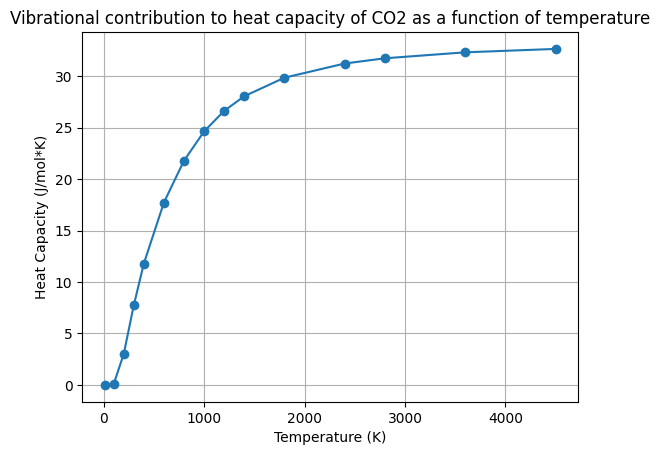

In [5]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

def vibrational_heat_capacity(Theta, T):
    cv_sum = 0
    for theta in Theta:
        cv_sum += (theta / T)**2 * np.exp(- theta / T) / (np.exp(- theta / T) - 1)**2
    
    #print(constants.Boltzmann * cv_sum)
    cv = constants.Avogadro * constants.Boltzmann * cv_sum
    return cv

Theta = [
    984.86,
    984.86,
    1999.48,
    3502.99
]

Temps = [
    10,
    100,
    200,
    300,
    400,
    600,
    800,
    1000,
    1200,
    1400,
    1800,
    2400,
    2800,
    3600,
    4500,
]

c_vib_plot = []

for temp in Temps:
    c_vib = vibrational_heat_capacity(Theta, temp)
    #print('Temperature: %s; C_vib: %s' % (temp, c_vib))
    c_vib_plot.append(c_vib)

plt.plot(Temps, c_vib_plot, marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/mol*K)')
plt.title('Vibrational contribution to heat capacity of CO2 as a function of temperature')
plt.grid(True)
plt.show()



Now we can do the same for some additional small molecules

(Curly brackets contain the tabulated value)

| Molecule | Normal Mode Frequencies $[cm^{-1}]$ | Characteristic Temperatures | Rotational Temperature(s) $[K]$ |
| --- | --- | --- | --- |
| $CO_2$ | 684(2) <br /> 1389 <br /> 2434 | 984.86(2) <br /> 1999.48 <br /> 3502.99 | 0.56 {0.56}|
| $H_2O$ | 1678 <br /> 3875 <br /> 3979 | 2414.60 <br /> 5575.90 <br /> 5724.61 | 38.96 {40.10} <br /> 21.17 {20.90} <br /> 13.72 {13.40} |
| $CH_4$ | 1356(3) <br /> 1581(2) <br /> 3052 <br /> 3169(3) | 1950.58 <br /> 1951.06 <br /> 1951.40 <br /> 2274.77 <br /> 2274.86 <br /> 4391.22 <br /> 4559.39 <br /> 4559.87 <br /> 4560.12 | 7.63(3) {7.54(3)} |
| $CH_3Cl$| 756 <br /> 1043(2) <br /> 1402 <br /> 1506(2) <br /> 3100(3) | 1088.10 <br /> 1500.74 <br /> 1501.37  <br /> 2016.70  <br /> 2167.14  <br /> 2167.86  <br /> 4460.76  <br /> 4604.56  <br /> 4605.03 | 7.59 {7.32}  <br /> 0.64(2) {0.64(2)} <br /> |

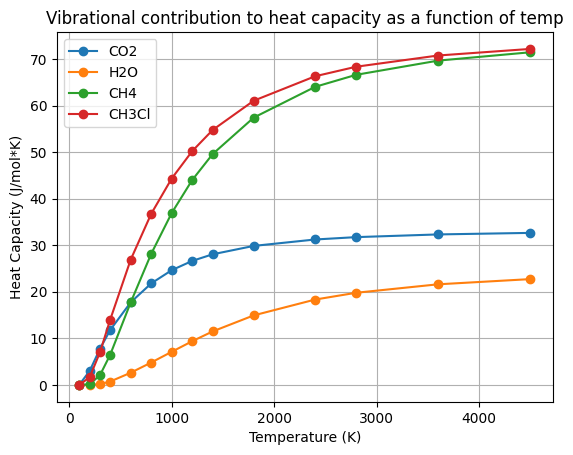

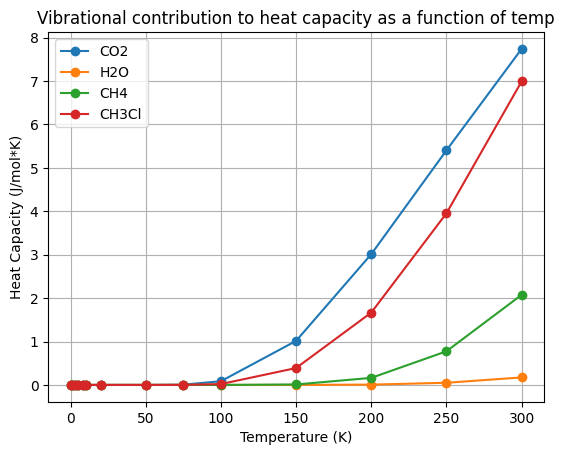

Exec. Time [s]:  0.4659726619720459


In [6]:
import time
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

start = time.time()


def vibrational_heat_capacity(Theta, T):
    cv_sum = 0
    for theta in Theta:
        cv_sum += (theta / T)**2 * np.exp(-theta / T) / (np.exp(-theta / T) - 1)**2
    cv = constants.Avogadro * constants.Boltzmann * cv_sum
    return cv

def plot_vibrational_heat_capacity(molecule_data, temperatures):
    heat_capacity_data = {}

    for molecule_name, theta in molecule_data.items():
        c_vib_plot = []
        for temp in temperatures:
            c_vib = vibrational_heat_capacity(theta, temp)
            c_vib_plot.append(c_vib)
        heat_capacity_data[molecule_name] = c_vib_plot

    for molecule_name, c_vib_values in heat_capacity_data.items():
        plt.plot(temperatures, c_vib_values, marker='o', label=molecule_name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (J/mol*K)')
    plt.title('Vibrational contribution to heat capacity as a function of temp')
    plt.show()

molecules = {
    "CO2": [984.86, 984.86, 1999.48, 3502.99],
    "H2O": [2414.6, 5575.9, 5724.61],
    "CH4": [1950.58, 1951.06, 1951.4, 2274.77, 2274.86, 4391.22, 4559.39, 4559.87, 4560.12],
    "CH3Cl": [1088.10, 1500.74, 1501.37, 2016.70, 2167.14, 2167.86, 4460.76, 4604.56, 4605.03]
}

high_temperatures = [
    100, 200, 300, 400, 600, 800, 1000, 1200, 1400, 
    1800, 2400, 2800, 3600, 4500
]

low_temperatures = [ 0.1, 1, 3, 5, 8, 10, 20, 50, 75, 100, 150, 200, 250, 300]

plot_vibrational_heat_capacity(molecules, high_temperatures)
plot_vibrational_heat_capacity(molecules, low_temperatures)

print("Exec. Time [s]: ", time.time() - start)

With the vibrational contribution solved, we now have to calculate other contributions to total heat capacity $C_V$:\
(source slides 3,9 and 12 of C05_23_polyatomic_gas_equilibrium)

$C_V = C_{V, trans} + C_{V, rot} + C_{V, vib}$

**Translational Contribution**\
Translational contribution to molar heat capacity at constant volume is quite straightforward as each degree of translational freedom contributes $R/2$:

$C_{V, trans} = \frac{3}{2}R$

**Rotational Contribution**\
Similarly for rotational contribution. Each degree of freedom contributes $R/2$ with the distinction that the total rotational contribution depends on the linearity of the studied molecule, as linear molecules have only two (footnote: or one?) rotational degrees of freedom.

For linear molecules: $C_{V, rot} = R$\
For non-linear molecules: $C_{V, rot} = \frac{3}{2}R$

**Electronic Contribution**\
 I neglected it for gas. Usually only noticeable in metals with large amounts of free electrons (Heat capacity of metals => Sommerfeld theory of metals)

Plotted below (**USING kJ NOW**)

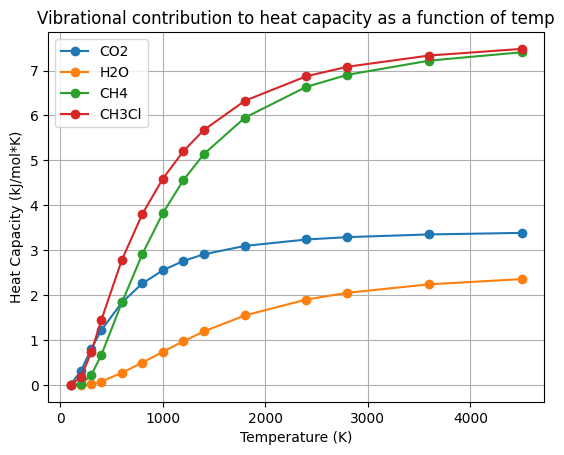

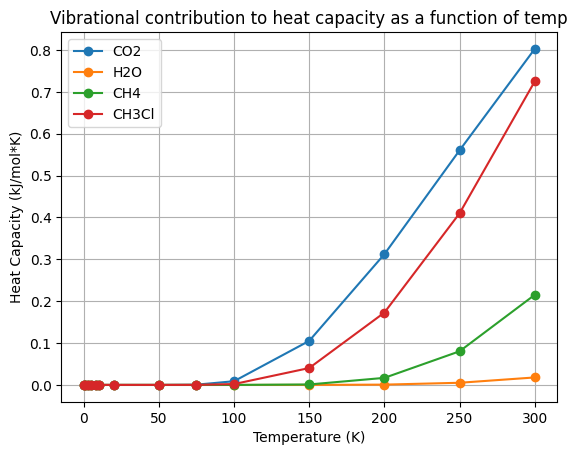

Exec. Time [s]:  0.5244269371032715


In [1]:
import time
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

start = time.time()


def heat_capacity(Theta, T, linearity):
    cv_vib = 0
    if linearity:
        cv_rot = constants.gas_constant
    else:
        cv_rot = (3 * constants.gas_constant)/2

    for theta in Theta:
        cv_vib += (theta / T)**2 * np.exp(-theta / T) / (np.exp(-theta / T) - 1)**2
    cv = ((3 * constants.gas_constant)/2) * cv_rot * (constants.Avogadro * constants.Boltzmann * cv_vib)
    return cv/1000

def plot_heat_capacity(molecule_data, temperatures):
    heat_capacity_data = {}

    for molecule_name, theta in molecule_data.items():
        if "CO2" or "H2" or "N2" in molecule_name:
            linearity = True
        else:
            linearity = False
        c_vib_plot = []
        for temp in temperatures:
            c_vib = heat_capacity(theta, temp, linearity)
            c_vib_plot.append(c_vib)
        heat_capacity_data[molecule_name] = c_vib_plot

    for molecule_name, c_vib_values in heat_capacity_data.items():
        plt.plot(temperatures, c_vib_values, marker='o', label=molecule_name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (kJ/mol*K)')
    plt.title('Vibrational contribution to heat capacity as a function of temp')
    plt.show()

molecules = {
    "CO2": [984.86, 984.86, 1999.48, 3502.99],
    "H2O": [2414.6, 5575.9, 5724.61],
    "CH4": [1950.58, 1951.06, 1951.4, 2274.77, 2274.86, 4391.22, 4559.39, 4559.87, 4560.12],
    "CH3Cl": [1088.10, 1500.74, 1501.37, 2016.70, 2167.14, 2167.86, 4460.76, 4604.56, 4605.03]
}

high_temperatures = [
    100, 200, 300, 400, 600, 800, 1000, 1200, 1400, 
    1800, 2400, 2800, 3600, 4500
]

low_temperatures = [ 0.1, 1, 3, 5, 8, 10, 20, 50, 75, 100, 150, 200, 250, 300]

plot_heat_capacity(molecules, high_temperatures)
plot_heat_capacity(molecules, low_temperatures)

print("Exec. Time [s]: ", time.time() - start)